<center>
<div class="alert alert-block alert-info">
    <h1> </h1>
    <h1><font size="+3"> <b> Math340 Final Exam Part B </b> </font></h1>
    <h1><font size="+3"> <b> Programming in Mathematics </b> </font></h1>
    <h1><font size="+3"> <b> Due December 18, 2024 </b> </font></h1>
    
</div>
</center>

<br>



<center>
<font size="+2">
Department of Mathematics and Statistics <br> <br>
San Diego State University <br> <br>
Fall 2024
</font>
</center>








## Your Name: Vince Verdugo

## Your ID: 826107601

## Results for Question 1

### 1A

Considering the data points (1,2), (2,3), and (3,5), we will construct two cubic polynomials $S_0$ and $S_1$ over the intervals $x \in [1,2]$ and $x \in [2,3]$ respectively.

We will define our polynomials as 
$$ S_0(x) = a_0(x-x_0)^3 + b_0(x-x_0)^2 + c_0(x-x_0) + d_0 $$
$$ S_1(x) = a_1(x-x_1)^3 + b_1(x-x_1)^2 + c_1(x-x_1) + d_1 $$

Given our points (1,2), (2,3), (3,5) $\to x_0 = 1, x_1 = 2, x_2 = 3$ and $f(x_0) = 1, f(x_1) = 2, f(x_2) = 3$

Thus our polynomials can be represented by as:
$$
\begin{align*}
\boxed{
\begin{aligned}
S_0(x) &= a_0(x-1)^3 + b_0(x-1)^2 + c_0(x-1) + d_0 \\
S_1(x) &= a_1(x-2)^3 + b_1(x-1)^2 + c_1(x-1) + d_1
\end{aligned}
}
\end{align*}
$$

To determine the coefficients of $S_0$ and $S_1$, we will construct a system of equations that will calculate our coefficients for both natural cubic splines and clamped.

In [1]:
import numpy as np
import sympy as sp

#Define our coefficient varibles and variable x
a0, b0, c0, d0, a1, b1, c1, d1 = sp.symbols('a0, b0, c0, d0, a1, b1, c1, d1')
x = sp.Symbol('x')

#Points (1,2), (2,3), (3,5) : (x_j, f(x_j)) for j = 0, 2(n-1)
S0 = a0*(x-1)**3 + b0*(x-1)**2 + c0*(x-1) + d0 
S1 = a1*(x-2)**3 + b1*(x-2)**2 + c1*(x-2) + d1 

#Define the functions S'0, S'1, S"0, S"1
S0_prime = sp.diff(S0, x)
S1_prime = sp.diff(S1, x)
S0_prime2 = sp.diff(S0, x, x) #Second derivative
S1_prime2 = sp.diff(S1, x, x) #Second derivative

#### (a)

In [2]:
#Solve for coefficients using equations A-G outlined in lecture
A = sp.Eq(S0.subs(x,1), 2) #S0(x_1) = f(x_1)
B = sp.Eq(S0.subs(x,2), 3) #S0(x_2) = f(x_2)
C = sp.Eq(S1.subs(x,2), 3) #S1(x_1) = f(x_1)
D = sp.Eq(S1.subs(x,3), 5) #S2(x_2) = f(x_2)
E = sp.Eq(S0_prime.subs(x,2), S1_prime.subs(x,2)) #S0'(x_1) = S1'(x_1)
F = sp.Eq(S0_prime2.subs(x,2), S1_prime2.subs(x,2)) #S0"(x_1) = S1"(x_1)

#G defines natural BCs at endpoints, define as n_BC1, n_BC2
n_BC1 = sp.Eq(S0_prime2.subs(x,1), 0) #S0"(x_0) = 0
n_BC2 = sp.Eq(S1_prime2.subs(x,3), 0) #S1"(x_2) = 0

#Create system of equations and solve for natural spline coefficients
nspl_coeffs = sp.solve([A, B, C, D, E, F, n_BC1, n_BC2],
                  [a0, b0, c0, d0, a1, b1, c1, d1])
print(nspl_coeffs)

{a0: 1/4, a1: -1/4, b0: 0, b1: 3/4, c0: 3/4, c1: 3/2, d0: 2, d1: 3}


In [3]:
#Define natural spline cubic polynomials using above coefficients 
S0_n = lambda x: 0.25*(x-1)**3 + 0.75*(x-1) + 2
S1_n = lambda x: -0.25*(x-2)**3 + 0.75*(x-2)**2 + 1.5*(x-2) + 3

#### (b)

In [4]:
#Repeat process using BCs for clamped spline
c_BC1 = sp.Eq(S0_prime.subs(x,1), 1.5) #S0'(x_0) = 1.5
c_BC2 = sp.Eq(S1_prime.subs(x,3), 1.5) #S1"(x_2) = 1.5

cspl_coeffs = sp.solve([A, B, C, D, E, F, c_BC1, c_BC2],
                  [a0, b0, c0, d0, a1, b1, c1, d1])
print(cspl_coeffs)

{a0: 1.00000000000000, a1: -1.00000000000000, b0: -1.50000000000000, b1: 1.50000000000000, c0: 1.50000000000000, c1: 1.50000000000000, d0: 2.00000000000000, d1: 3.00000000000000}


In [5]:
#Define clamped spline cubic polynomials using above coefficients 
S0_c = lambda x: (x-1)**3 - 1.5*(x-1)**2 + 1.5*(x-1) + 2
S1_c = lambda x: -(x-2)**3 + 1.5*(x-2)**2 + 1.5*(x-2) + 3

#### (c)

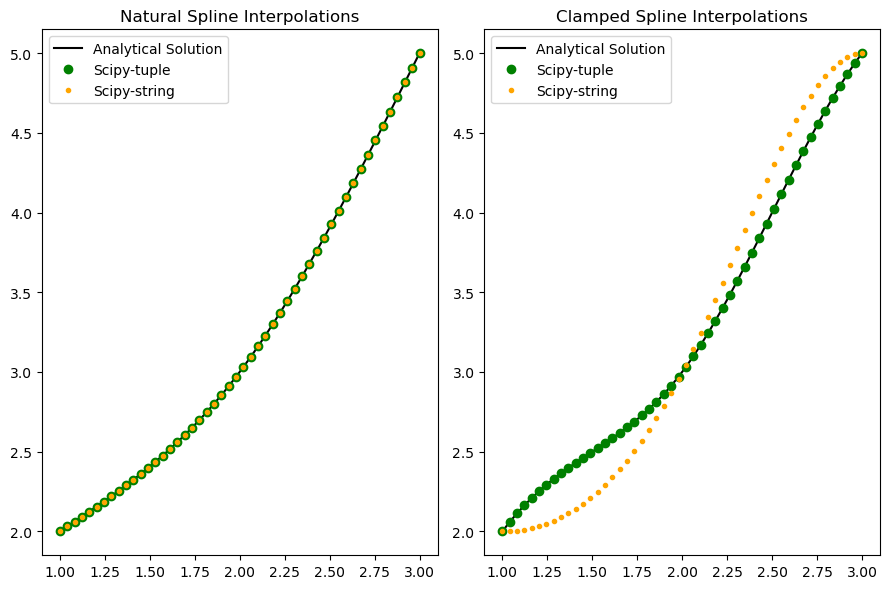

In [18]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

#Define (x,y) vals and define interval 
xvals = np.array([1,2,3])
yvals = np.array([2,3,5])
#Define domain intervals
x = np.linspace(1,3,50) #Cumulative interval
#Create arrays that will store analytical solutions for natural and clamped splines
an_nspl = np.zeros(50)
an_cspl = np.zeros(50)

#Create natural and clamped splines using CubicSpline
spl1 = CubicSpline(xvals, yvals, bc_type='natural')
spl2 = CubicSpline(xvals, yvals, bc_type=((2,0),(2,0)))
spl3 = CubicSpline(xvals, yvals, bc_type='clamped')
spl4 = CubicSpline(xvals, yvals, bc_type=((1,1.5),(1,1.5)))

#Evaluate cubic spline interpretations for values of total domain x and seperated domains
cs_nspl1 = spl1(x)
cs_nspl2 = spl2(x)
cs_cspl1 = spl3(x)
cs_cspl2 = spl4(x)
#Analytical solution with polynomial and corresponding domain
an_nspl[0:25] = S0_n(x[0:25]) #x[0:25] represents [1,2]
an_nspl[25:] = S1_n(x[25:]) #x[25:] represents [2,3]
an_cspl[0:25] = S0_c(x[0:25])
an_cspl[25:] = S1_c(x[25:])

#Plot natural and clamped spline iterpolations and compare results of each method
plt.figure(figsize=(9,6))
#Natural spline plot
plt.subplot(1,2,1)
plt.plot(x, an_nspl, 'k' ,label='Analytical Solution')
plt.plot(x, cs_nspl2, 'go', label='Scipy-tuple')
plt.plot(x, cs_nspl1, '.', color='orange', label='Scipy-string')
plt.title('Natural Spline Interpolations')
plt.legend()

#Natural spline plot
plt.subplot(1,2,2)
plt.plot(x, an_cspl, 'k' ,label='Analytical Solution')
plt.plot(x, cs_cspl2, 'go', label='Scipy-tuple')
plt.plot(x, cs_cspl1, '.', color='orange', label='Scipy-string')
plt.title('Clamped Spline Interpolations')
plt.legend()
plt.tight_layout()

plt.show()

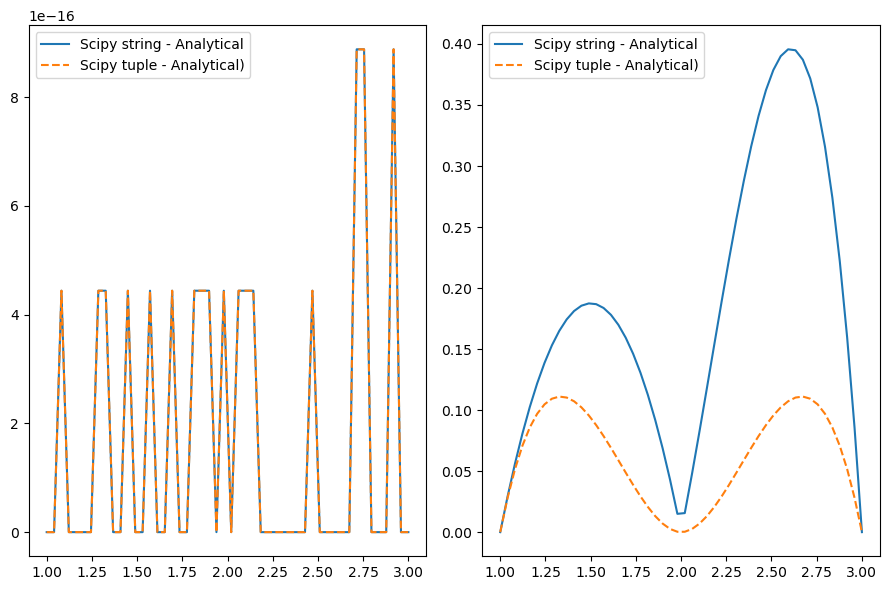

In [21]:
#Compute differences
#Natural spline
an_ndiff1 = abs(cs_nspl1 - an_nspl)
an_ndiff2 = abs(cs_nspl2 - an_nspl)

#Clamped spline
an_cdiff1 = abs(cs_cspl1 - an_nspl)
an_cdiff2 = abs(cs_cspl2 - an_nspl)

#As functions of x (plot)
#Natural spline
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.plot(x, an_ndiff1, label='Scipy string - Analytical')
plt.plot(x, an_ndiff2, '--', label='Scipy tuple - Analytical)')
plt.legend()

#Clamped spline
plt.subplot(1,2,2)
plt.plot(x, an_cdiff1, label='Scipy string - Analytical')
plt.plot(x, an_cdiff2, '--', label='Scipy tuple - Analytical)')
plt.legend()
plt.tight_layout()
plt.show()

### 1B

#### (d)

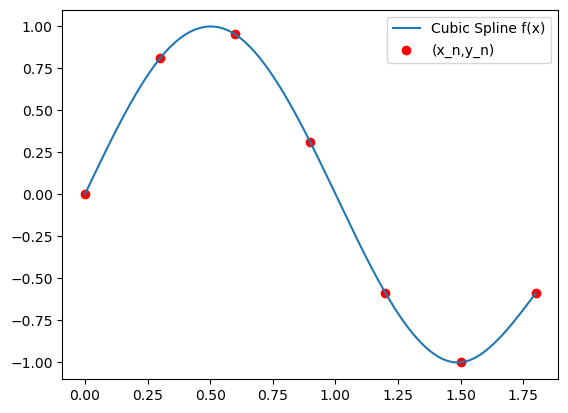

In [25]:
#Data points given in code
x_n = np.array([0., 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])
y_n = np.array([0., 0.809, 0.951, 0.309, -0.588, -1., -0.588])

#Define domain x using given dx
dx = 0.01
x2 = np.arange(0,1.8+dx, dx)

#Create natural spline f(x) using given points
nspl = CubicSpline(x_n, y_n, bc_type='natural')
f = nspl(x2)

#Generate plot
plt.plot(x2, f, label='Cubic Spline f(x)')
plt.scatter(x_n, y_n, color='red', label='(x_n,y_n)')
plt.legend()
plt.show()

#### (e)

In [85]:
#Using finite difference scheme
f_prime2 = (f[2:] - 2*f[1:-1] + f[:-2])/dx**2
#Define list, used to append values where f(x) > 0
ratio_vals = []

for i in range(1, len(x2)-1):
    #Determine f(x) > 0
    if (f[i] > 0):
        #Calculate ratio
        ratio_vals.append(f_prime2[i]/f[i])

#Convert to numpy array
ratios = np.array(ratio_vals)

#### (f)

Given the differential equation
$$y^" = -\beta^2 y$$

we can use our ratio above to find the value of $\beta$ because if we isolate $\beta^2$, we are left with 
$$\frac{y^"}{y} = -\beta^2$$ 

the LHS of our equation directly reflects our ratio $\frac{f^"}{f}$

In [89]:
#Find beta by taking square root and multiplying  by -1
beta = np.sqrt(abs(ratios))
print(beta)

[4.27918007 3.70672719 3.49607048 3.38686725 3.32072492 3.27704052
 3.24666813 3.22492385 3.20916072 3.19777099 3.18972298 3.18432557
 3.18109967 3.179704   3.17989009 3.18147406 3.18431809 3.18831818
 3.19339563 3.19949109 3.20656041 3.21457148 3.22350206 3.23333808
 3.24407244 3.25570405 3.26823721 3.28168107 3.2885313  3.2672606
 3.24121471 3.21772286 3.19661365 3.17773768 3.16096469 3.14618106
 3.13328791 3.12219934 3.11284112 3.10514949 3.09907017 3.09455765
 3.09157442 3.09009052 3.09008309 3.09153601 3.09443971 3.09879097
 3.10459288 3.11185479 3.12059244 3.13082804 3.14259058 3.15591606
 3.17084796 3.18743772 3.20574537 3.22584027 3.24021954 3.22585495
 3.20504093 3.18532461 3.16666747 3.14903548 3.13239901 3.11673268
 3.10201527 3.08822978 3.07536345 3.06340795 3.05235956 3.04221955
 3.03299458 3.0246973  3.01734713 3.01097125 3.00560584 3.00129778
 2.99810673 2.99610797 2.99539601 2.99608952 2.99833788 3.00233014
 3.00830752 3.01658101 3.02755688 3.04177438 3.05455309 3.04767

### Results for Question 2

Find
$$\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial \hat{q}}\frac{\partial \hat{q}}{\partial z}\frac{\partial z}{\partial a}\frac{\partial a}{\partial x}\frac{\partial x}{\partial w_1}$$
where $a$ = $\sigma (t) = \frac{1}{1+e^{-x}}$

$$x = w_1u + w_2v + b_1$$
$$a = \frac{1}{1+e^{-t}}$$
$$z = w_3a + b_2$$
$$\hat{q} = z$$

In [41]:
import sympy as sp
x = sp.Symbol('x')
sigma = sp.Function('sigma')

#Define activation function and take derivative with respect to x
sigma = 1/(1+sp.exp(-x))
dsigma_dx = sp.diff(sigma, x)

display(dsigma_dx)

exp(-x)/(1 + exp(-x))**2

$$\frac{\partial x}{\partial w_1} = \frac{\partial}{\partial w_1}(w_1u + w_2v + b_1) = u$$

$$\frac{\partial a}{\partial x} = \frac{e^{-x}}{(1+e^{-x})^2}$$

$$\frac{\partial z}{\partial a} = \frac{\partial}{\partial a}\left(w_3a + b2\right) = w_3 $$

$$\frac{\partial \hat{q}}{\partial z} = 1 $$

$$\frac{\partial L}{\partial \hat{q}} = \frac{\partial}{\partial \hat{q}}\left(\frac{(q-\hat{q})^2}{2}\right) = -(q-\hat{q})$$

$$\frac{\partial L}{\partial w_1} = -(q-\hat{q})*1*w_3*\frac{e^{-x}}{(1+e^{-x})^2}*u$$

$$ \boxed{\frac{\partial L}{\partial w_1} = -w_3u(q-\hat{q})\frac{e^{-x}}{(1+e^{-x})^2}} $$

#### (b)

In [50]:
#Used symbolic computing above to generate da/dx
#Lambify solution to plot
lam_dsigma_dx = sp.lambdify(x, dsigma_dx, modules=['numpy'])

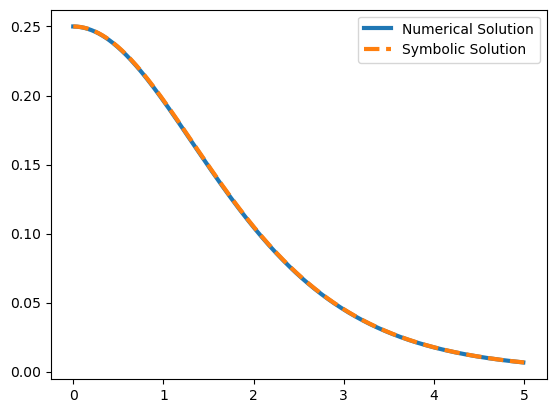

In [61]:
#Using numerical methods
#Choose domain [0,5] and dt = 0.01
dt = 0.01
x3 = np.arange(0,5+dt,dt)
sigma = 1/(1 + np.exp(-x3))

#Find da/dx using Euler method
da_dx = (sigma[1:] - sigma[:-1])/dt 
#Find da/dx using symbolic computing (lambdified)
da_dx_sym = lam_dsigma_dx(x3)

plt.plot(x3[:-1], da_dx, linewidth=3, label='Numerical Solution')
plt.plot(x3, da_dx_sym, '--', linewidth=3, label='Symbolic Solution')
plt.legend()
plt.show()

#### (c)

Let our finite difference equation be defined 
$$ \frac{dX}{dt} = \sigma X $$

Applying the forward difference scheme:
$$\frac{X_{n+1}- X_{n-1}}{2 \Delta t} = \sigma X_n $$

Isolating $X_{n+1}$,
$$ X_{n+1} = X_{n-1} + 2 \sigma \Delta t X $$

Thus for $ \sigma = \frac{1}{2 \Delta t} $, we get the solution:

$$ X_{n+1} = X_{n-1} + X_n $$

Which is our equation for the Fibonacci Sequences

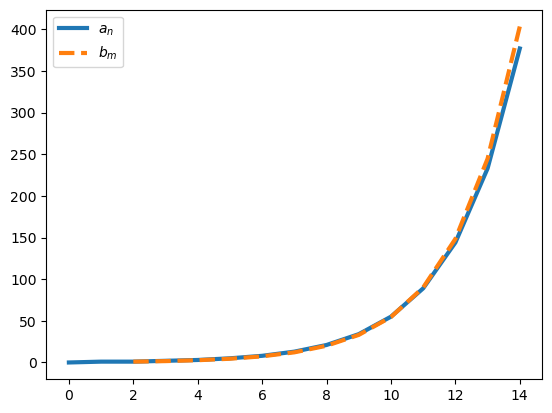

In [74]:
#Define x values
x_n = np.arange(0,15)
x_m = np.arange(2,15)
#Define arrays for a_n and b_m values
a = np.zeros(len(x_n))
b = np.zeros(len(x_m))
#Define ics a0 and a1
a[0] = 0
a[1] = 1

#Define Fibonacci sequence
for i in range(1, len(x_n)-1):
    a[i+1] = a[i] + a[i-1]

#Define b_m sequence
for j in range(0, len(x_m)):
    b[j] = (np.sqrt(np.e)**(x_m[j]-2))

#Generate plots
plt.plot(x_n, a, linewidth=3, label='$a_n$')
plt.plot(x_m, b, '--', linewidth=3, label='$b_m$')
plt.legend()
plt.show()

By looking at the graph above, it is clear that the two approximations, $a_n$ and $b_m$, are very similar. While $a_n$ starts at x=0, $b_m$ starts at x=2. As x increases, the two functions behave almost identically. Around x=11, the two functions begin to seperate and we can see that the function $b_m$ starts to grow faster than $a_n$. The expression $b_m = (\sqrt(e)^{m-2})$ could be a solution to the ODE in part C because as we see above, using the forward difference scheme we can modify our solution to be the recurrence relation represented by the Fibonacci Sequence. 